In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
%matplotlib inline
%pylab inline
import seaborn as sns
import datetime as dt

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Loading dataset
ms = pd.read_csv('Microsoft_Stock.csv')
ms.head(5)

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [3]:
ms.tail(5)

,Date,Open,High,Low,Close,Volume
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012
1510,3/31/2021 16:00:00,232.91,239.10,232.39,235.77,43623471


In [4]:
ms.set_index('Date')

,Open,High,Low,Close,Volume
Date,,,,,
4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...
3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455


In [5]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [6]:
# Exploratory data analysis
ms['Date'] = pd.to_datetime(ms['Date'])

In [7]:
ms.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

<AxesSubplot:ylabel='Close'>

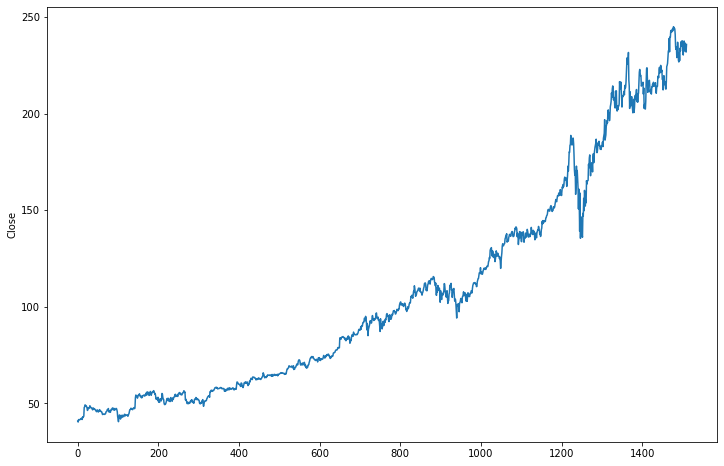

In [8]:
# Plotting close price
plt.figure(figsize(12,8))
sns.lineplot(data=ms, x=ms.index, y='Close')

In [9]:
ms['Daily Lag'] = ms['Close'].shift(1)
ms.head(5)

,Date,Open,High,Low,Close,Volume,Daily Lag
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,NaN
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,40.72
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,40.29
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,41.55
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,41.53


In [10]:
ms['Daily Return'] = (ms['Daily Lag']/ms['Close']) - 1
ms.head(5)

,Date,Open,High,Low,Close,Volume,Daily Lag,Daily Return
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,NaN,NaN
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,40.72,0.010673
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,40.29,-0.030325
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,41.55,0.000482
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,41.53,0.002656


<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

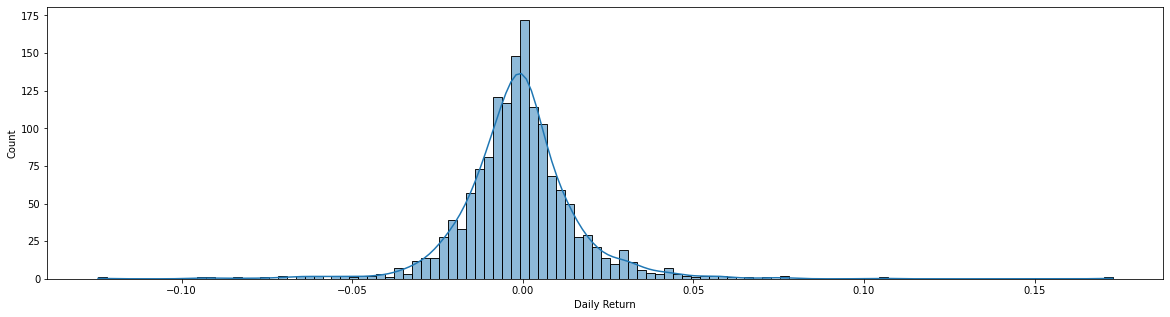

In [31]:
sns.histplot(data=ms, x='Daily Return', kde=True)

In [12]:
ms['Daily Return'].describe()

count    1510.000000
mean       -0.001011
std         0.017441
min        -0.124473
25%        -0.009014
50%        -0.001031
75%         0.006107
max         0.172870
Name: Daily Return, dtype: float64

In [13]:
print('Skewness: %f' % ms['Daily Return'].skew())
print('Kurtosis: %f ' %  ms['Daily Return'].kurt())

Skewness: 0.447641
Kurtosis: 11.978784 


In [14]:
# Stationarity of the price series
from statsmodels.tsa.stattools import adfuller
result = adfuller(ms['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 1.737136
p-value: 0.998216


### Since p-value > 0.05, it failed to reject the null hypothesis that the price series is non-stationary. Hence, we will have to find the order of differencing

In [15]:
# Order of differencing
from pmdarima.arima.utils import ndiffs
ndiffs = ndiffs(ms['Close'], test='adf')
print('Order of differencing: %f '% ndiffs)

Order of differencing: 1.000000 


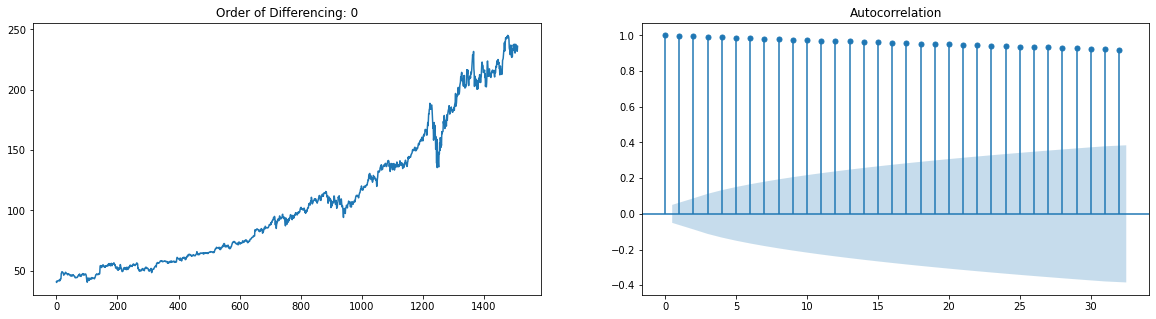

In [32]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2) = plt.subplots(1, 2)
figsize(20, 5)

ax1.plot(ms['Close'])
ax1.set_title('Order of Differencing: 0')
plot_acf(ms['Close'], ax=ax2);

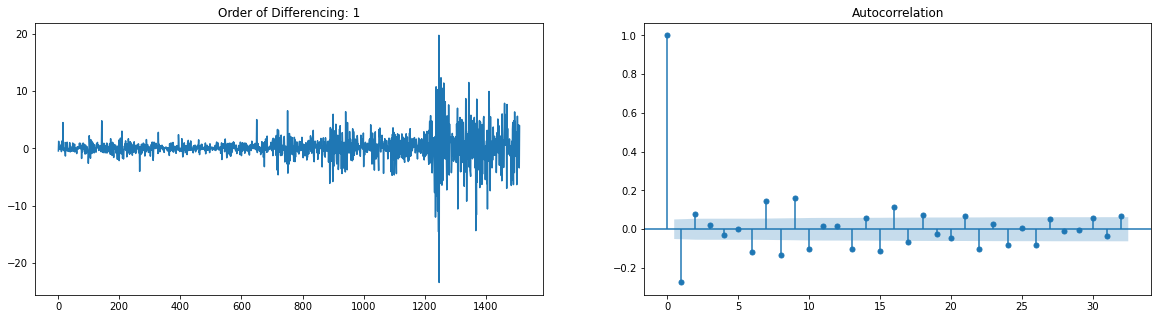

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2)
figsize(20, 5)

diff = ms['Close'].diff().dropna()
ax1.plot(diff)
ax1.set_title('Order of Differencing: 1')
plot_acf(diff, ax=ax2);

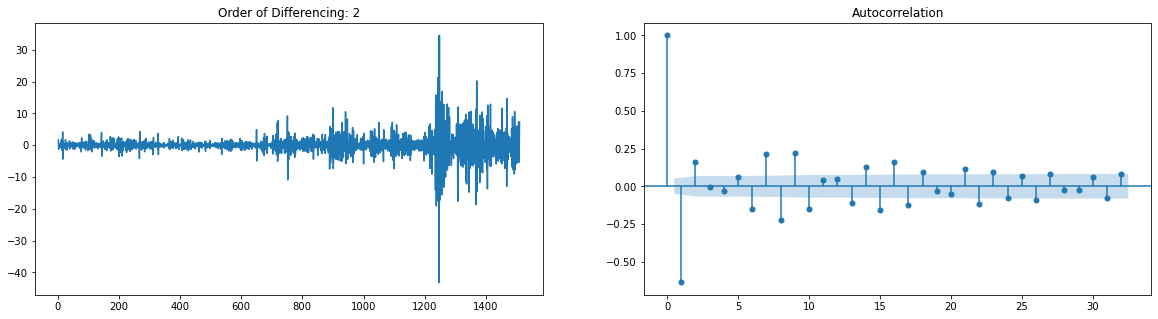

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2)
figsize(20, 5)

diff = ms['Close'].diff().diff().dropna()
ax1.plot(diff)
ax1.set_title('Order of Differencing: 2')
plot_acf(diff, ax=ax2);

### Autocorrelation plot shows that differencing twice causes over-differencing. Hence, the order of differencing is indeed 1 as suggested in order to stationarize the price series

# P Term (Number of Autoregressive Terms)

### After figuring out the order of differencing, the p term (number of autoregressive terms, number of lags) is determined by analyzing the partial autocorrelation plot

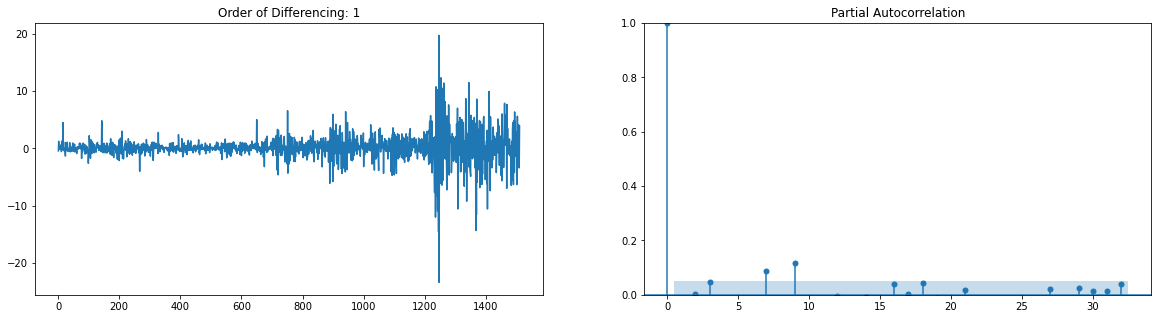

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf

# Using first order of differencing
diff = ms['Close'].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.plot(diff)
ax1.set_title('Order of Differencing: 1')
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

### Since both 7 and 9 are well above the significance line, these could be used as the p term in the ARIMA model. To be more conservative, 9 will be applied

# Q Term (Number of Lagged Forecast Errors/Number of Moving Average Term)

### The q term is determined by analyzing the ACF plot

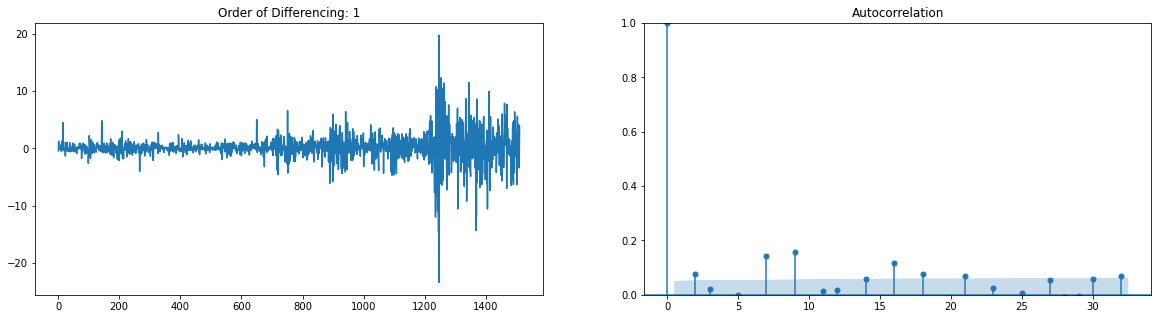

In [20]:
# Using first order of differencing
diff = ms['Close'].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.plot(diff)
ax1.set_title('Order of Differencing: 1')
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

### Since 2 sufficiently explains Y, we will determine the q term to be 2

# ARIMA Model

In [21]:
from statsmodels.tsa.arima.model import ARIMA

# Fitting the ARIMA model
model = ARIMA(ms['Close'], order=(9, 1, 2), trend='t')
result = model.fit()

In [22]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1511
Model:                 ARIMA(9, 1, 2)   Log Likelihood               -3339.587
Date:                Tue, 13 Jul 2021   AIC                           6705.174
Time:                        00:36:30   BIC                           6774.332
Sample:                             0   HQIC                          6730.929
                               - 1511                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1290      0.047      2.746      0.006       0.037       0.221
ar.L1         -0.8861      0.187     -4.744      0.000      -1.252      -0.520
ar.L2         -0.4724      0.175     -2.695      0.007      -0.816      -0.129
ar.L3         -0.0159      0.041     -0.386      0.699      -0.097       0.065
ar.L4          0.0192      0.022      0.870      0.385      -0.024       0.062
ar.L5         -0.0475      0.020     -2.398      0.016      -0.086      -0.009
ar.L6         -0.1527      0.023     -6.727      0.000      -0.197      -0.108
ar.L7         -0.0179      0.033     -0.539      0.590      -0.083       0.047
ar.L8         -0.0315      0.023     -1.372      0.170      -0.077       0.014
ar.L9          0.0963      0.022      4.351      0.000       0.053       0.140
ma.L1          0.6423      0.186      3.458      0.001       0.278       1.006
ma.L2          0.3174      0.134      2.377      0.017       0.056       0.579
sigma2         4.8799      0.081     59.892      0.000       4.720       5.040
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6784.21
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              18.77   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

(array([0.00057421, 0.0027562 , 0.10347242, 0.06431138, 0.00206715,
        0.00022968, 0.        , 0.        , 0.        , 0.00011484]),
 array([-17.03731069, -11.27448168,  -5.51165267,   0.25117634,
          6.01400535,  11.77683437,  17.53966338,  23.30249239,
         29.0653214 ,  34.82815041,  40.59097942]),
 <BarContainer object of 10 artists>)

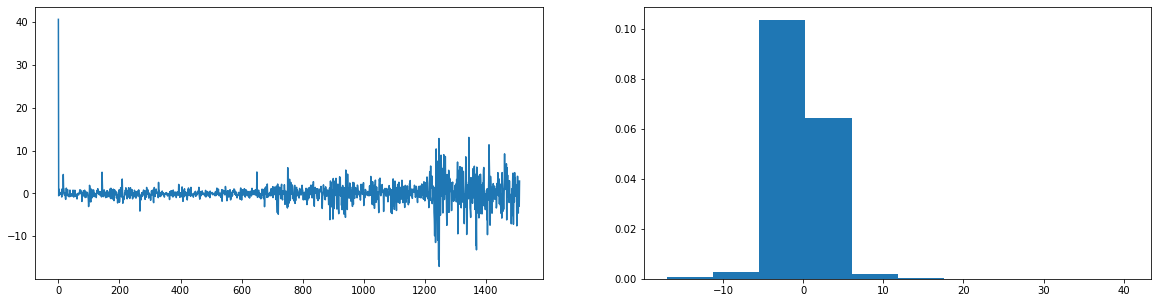

In [23]:
# Plotting the residual errors
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.plot(residuals)
ax2.hist(residuals, density=True)

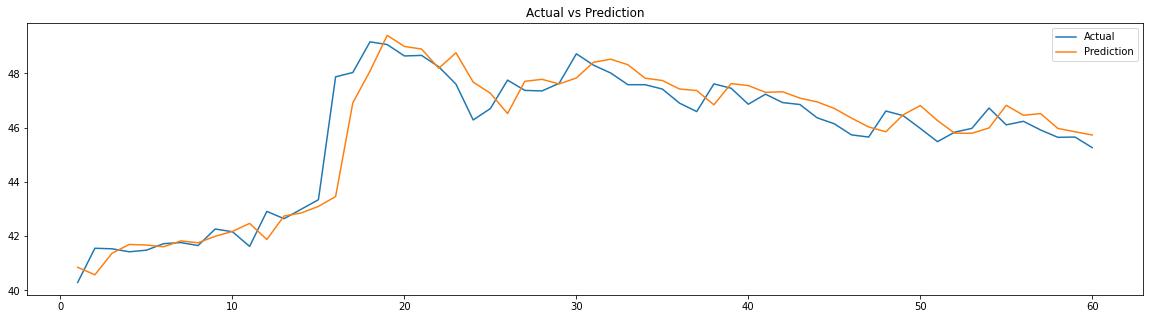

In [24]:
# In-sample prediction
pred = result.get_prediction(start=1, end=60).predicted_mean
plt.figure(figsize=(20, 5))
plt.plot(ms['Close'][1:61], label='Actual')
plt.plot(pred, label='Prediction')
plt.title('Actual vs Prediction')
plt.legend(loc='upper right')
plt.show()

# Forecasting

In [25]:
# Splitting into training and testing set
n = int(len(ms) * 0.8)
train = ms[:n]
test = ms[n:]

### 80% of the data will be used as training set.

In [26]:
# Applying ARIMA model to the training set
model = ARIMA(train['Close'], order=(9,1,2), trend='t')
result = model.fit()

In [27]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1208
Model:                 ARIMA(9, 1, 2)   Log Likelihood               -1942.337
Date:                Tue, 13 Jul 2021   AIC                           3910.673
Time:                        00:36:32   BIC                           3976.920
Sample:                             0   HQIC                          3935.621
                               - 1208                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1027      0.024      4.205      0.000       0.055       0.151
ar.L1         -0.0612      1.452     -0.042      0.966      -2.907       2.784
ar.L2          0.0286      0.201      0.142      0.887      -0.366       0.423
ar.L3          0.0404      0.150      0.270      0.787      -0.253       0.334
ar.L4         -0.0576      0.050     -1.153      0.249      -0.156       0.040
ar.L5         -0.0760      0.108     -0.701      0.483      -0.288       0.136
ar.L6         -0.0225      0.107     -0.211      0.833      -0.232       0.187
ar.L7          0.0380      0.048      0.792      0.428      -0.056       0.132
ar.L8         -0.1023      0.048     -2.113      0.035      -0.197      -0.007
ar.L9         -0.0055      0.156     -0.035      0.972      -0.312       0.301
ma.L1         -0.0648      1.451     -0.045      0.964      -2.908       2.778
ma.L2         -0.1345      0.238     -0.565      0.572      -0.601       0.332
sigma2         1.4629      0.035     41.768      0.000       1.394       1.532
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               864.88
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.17   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
# Out of sample forecast
steps = 100

forecast = result.get_forecast(steps)
fc = forecast.predicted_mean
se = forecast.se_mean
conf_int = forecast.conf_int(0.05)

In [29]:
# Lower bound and upper bound of the forecast
lb = conf_int.iloc[:, 0]
ub = conf_int.iloc[:, 1]

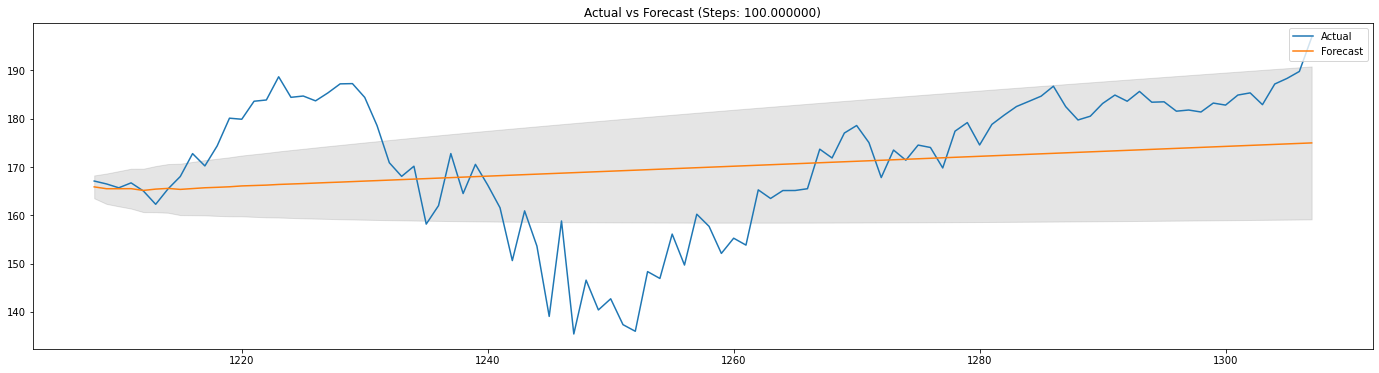

In [30]:
plt.figure(figsize=(24, 6))
plt.plot(test['Close'][:steps], label='Actual')
plt.plot(fc, label='Forecast')
plt.fill_between(lb.index, lb, ub, color='k', alpha=0.1)
plt.title('Actual vs Forecast (Steps: %f)' % steps)
plt.legend(loc='upper right')
plt.show()

### As shown above, ARIMA may not be a good model in forecasting stock prices. There are many more factors that could affect the ups and downs of the prices. It could be used to determine trend, but not for a short term forecasting.